In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def model_linear(x,w): # Model
    y = w[1]*x + w[0] # Linear predictor
    return y

def loss_MSE(y,t):
    N = np.shape(y)[0] # number of samples
    loss = np.sum(np.square(t-y)) / N
    return loss

def grad_MSE_linear(x,y,t):
    x1 = np.vstack((np.ones_like(x), x))
    e = (t.flatten() - y)
    N = np.shape(x)[0] # number of samples
    
    grad = - 1.0/N * x1.dot(e)
    return grad

7.751247009263216


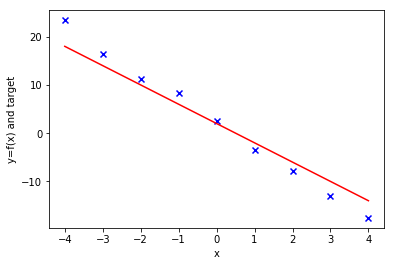

In [2]:
# COOK UP DATA
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]) # Inputs
w_ideal = np.array([2.0, -5.0]) # Actual bias and weight
t = w_ideal[1]*x + w_ideal[0] + 0.9*np.random.randn(np.size(x)) # Adding some noise to desired output

# TRY THE IDEAL WEIGHTS AND PLOT DATA
w = [2.0, -4.0] # Some estimated weights.
y = model_linear(x,w) # Model

# Plot data
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

# CHECK THE LOSS WITH IDEAL WEIGHTS. IT SHOULD BE LOW, IF THE NOISE IS LOW.
loss = loss_MSE(y,t)
print(loss)

817.4881970582051


Text(0,0.5,'y=f(x) and target')

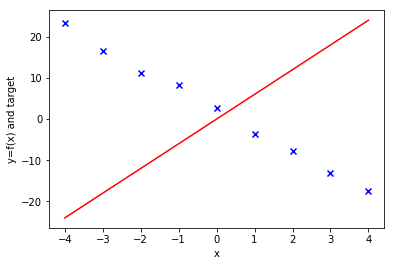

In [3]:
# INITIALIZE SOME WEIGHTS AND TRAINING HYPERPARAMETERS

w = np.array([0.0, 6.0]) # RANDOM INITIALIZATION OF WEIGHTS
learning_rate = 0.05 # HOW FAST WILL THE LEARNING CONVERGE
iterations = 0 # SET ITERATION COUNTER

# CHECK PLOT AND LOSS
y = model_linear(x,w) # Model 

loss = loss_MSE(y,t)
print(loss)

plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

[0.11043665 2.32107829]


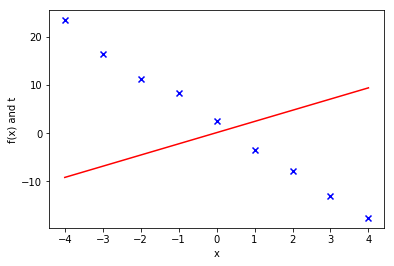

In [4]:
# PERFORM ONE ITERATION OF GRADIENT DESCENT USING MSE LOSS

iterations += 1 # Update iteration number

grad = grad_MSE_linear(x,y,t) # Compute gradient
delta_w = -learning_rate * grad # Update weight and bias
w += delta_w # Update weight and bias

# Plot data
y = model_linear(x,w) # Compute current output
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("f(x) and t")

print(w)

[2, array([ 0.21535146, -0.13153619]), 164.92384135143118]
[3, array([ 0.31502054, -1.7666125 ]), 75.42059960135379]
[4, array([ 0.40970616, -2.85666338]), 35.46391976302972]
[5, array([ 0.4996575 , -3.58336397]), 17.54523658277374]
[6, array([ 0.58511127, -4.06783102]), 9.436834067628926]
[7, array([ 0.66629236, -4.39080906]), 5.7026492666157065]
[8, array([ 0.74341439, -4.60612775]), 3.925280136547935]
[9, array([ 0.81668032, -4.74967355]), 3.0290856757047293]
[10, array([ 0.88628295, -4.84537074]), 2.534884032146161]
[11, array([ 0.95240545, -4.90916887]), 2.2286954298800756]
[12, array([ 1.01522182, -4.95170096]), 2.0145061634662778]
[13, array([ 1.07489738, -4.98005569]), 1.848820771475088]
[14, array([ 1.13158916, -4.99895884]), 1.711565447846269]
[15, array([ 1.18544635, -5.01156094]), 1.5931484038904733]
[16, array([ 1.23661068, -5.01996234]), 1.4887018597733503]
[17, array([ 1.2852168 , -5.02556327]), 1.3955165595089711]
[18, array([ 1.3313926 , -5.02929723]), 1.31189580637651

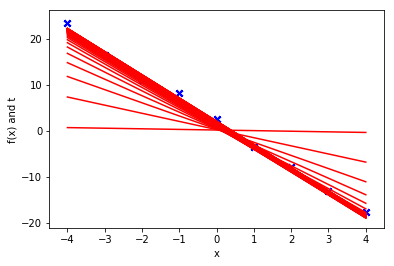

In [5]:
# Perform gradient descent in a loop

max_iter = 100 # Maximum iterations allowed
min_abs_change = 0.005 # Minimum change in weights allowed

while True:
    
    iterations += 1 # Update iteration number

    grad = grad_MSE_linear(x,y,t) # Compute gradient
    delta_w = -learning_rate * grad # Update weight and bias

    # Stopping Condition
    if np.sum(abs(delta_w)) < min_abs_change:
        break
    if iterations > max_iter:
        break

    w += delta_w # update weights

    # Plot data
    y = model_linear(x,w) # Compute current output
    plt.scatter(x, t, c="b", marker='x')
    plt.plot(x, y, c="r")
    plt.xlabel("x")
    plt.ylabel("f(x) and t")

    print([iterations,w,loss_MSE(y,t)])

In [6]:
import numpy as np

def model_logistic(x,w): # Model
    y = w[1]*x + w[0] # Linear predictor
    y = 1 / (1 + np.exp(-y)) # logistic
    return y

def loss_CE(y,t):    
    N = np.shape(y)[0] # number of samples    
    loss = - np.sum( t * np.log(y) + (1-t) * np.log(1-y) ) / N # Cross entropy
    return loss

def grad_CE_logistic(x,y,t):
    x1 = np.vstack((np.ones_like(x), x))
    N = np.shape(y)[0] # number of samples        
    grad = (1.0/len(x)) * np.dot( x1 , y - t ) / N # Gradient of cross entropy
    return grad

0.4397936969065664


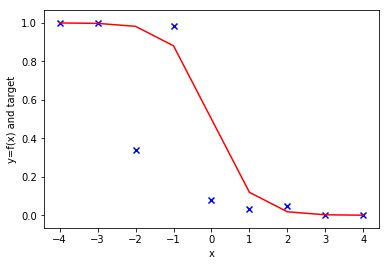

In [7]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]) # Inputs
w_ideal = np.array([0, -2.0]) # Actual bias and weight
t = w_ideal[1]*x + w_ideal[0] + 2*np.random.randn(np.size(x)) # Adding some noise to desired output
t = 1 / (1 + np.exp(-t))

# TRY THE IDEAL WEIGHTS AND PLOT DATA
w = w_ideal # Some estimated weights.
y = model_logistic(x,w) # Model

# Plot data
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")


# CHECK THE LOSS WITH IDEAL WEIGHTS. IT SHOULD BE LOW, IF THE NOISE IS LOW.
loss = loss_CE(y,t)
print(loss)

12.421161828521234


Text(0,0.5,'y=f(x) and target')

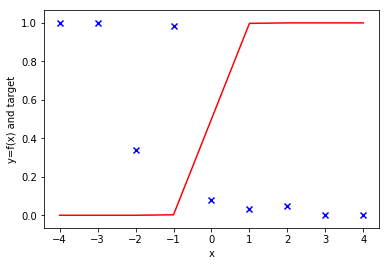

In [8]:
# INITIALIZE SOME WEIGHTS AND TRAINING HYPERPARAMETERS

w = np.array([0.0, 6.0]) # RANDOM INITIALIZATION OF WEIGHTS
learning_rate = 3 # HOW FAST WILL THE LEARNING CONVERGE
iterations = 0 # SET ITERATION COUNTER

# CHECK PLOT AND LOSS
y = model_logistic(x,w) # Model 

loss = loss_CE(y,t)
print(loss)

plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

[-0.07448742  4.62904016]


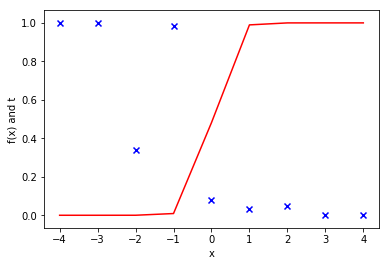

In [10]:
# PERFORM ONE ITERATION OF GRADIENT DESCENT USING MSE LOSS

iterations += 1 # Update iteration number

grad = grad_CE_logistic(x,y,t) # Compute gradient
delta_w = -learning_rate * grad # Update weight and bias
w += delta_w # Update weight and bias

# Plot data
y = model_logistic(x,w) # Compute current output
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("f(x) and t")

print(w)

[3, array([-0.11116836,  3.94401752]), 8.182973214356117]
[4, array([-0.14740688,  3.25973565]), 6.775714087953668]
[5, array([-0.18306151,  2.57698   ]), 5.376392473602496]
[6, array([-0.21781749,  1.89750111]), 3.9944640983464157]
[7, array([-0.25098622,  1.2257991 ]), 2.656217592577506]
[8, array([-0.2808842 ,  0.57700559]), 1.4563476750271045]
[9, array([-0.30277814,  0.015952  ]), 0.6858700317654157]
[10, array([-0.31517175, -0.30809301]), 0.4526932039233076]
[11, array([-0.32995265, -0.46944046]), 0.38904229750494873]
[12, array([-0.34699679, -0.57100138]), 0.36178475838295593]
[13, array([-0.36513145, -0.64347702]), 0.34693824594973793]
[14, array([-0.38374952, -0.69882352]), 0.33765897148296103]
[15, array([-0.40252101, -0.7429058 ]), 0.33130759781465824]
[16, array([-0.42125177, -0.77904201]), 0.32666550360881924]
[17, array([-0.43982061, -0.8092963 ]), 0.323098940297299]
[18, array([-0.4581488 , -0.83504207]), 0.3202491807816219]
[19, array([-0.47618396, -0.85724002]), 0.3178

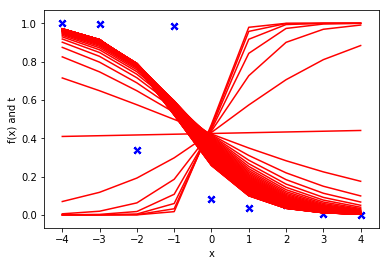

In [11]:
# Perform gradient descent in a loop

max_iter = 100 # Maximum iterations allowed
min_abs_change = 0.005 # Minimum change in weights allowed

while True:
    
    iterations += 1 # Update iteration number

    grad = grad_CE_logistic(x,y,t) # Compute gradient
    delta_w = -learning_rate * grad # Update weight and bias

    # Stopping Condition
    if np.sum(abs(delta_w)) < min_abs_change:
        break
    if iterations > max_iter:
        break

    w += delta_w # update weights

    # Plot data
    y = model_logistic(x,w) # Compute current output
    plt.scatter(x, t, c="b", marker='x')
    plt.plot(x, y, c="r")
    plt.xlabel("x")
    plt.ylabel("f(x) and t")

    print([iterations,w,loss_CE(y,t)])